In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2625,spam,"FREE RING TONE just text \POLYS\"" to 87131. Th...",NaN,NaN,NaN
2899,ham,Come aftr &lt;DECIMAL&gt; ..now i m cleaning ...,NaN,NaN,NaN
1955,ham,"Aight I'll grab something to eat too, text me ...",NaN,NaN,NaN
5357,ham,Ok,NaN,NaN,NaN
3480,ham,Wherre's my boytoy ? :-(,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.shape

(5572, 5)

In [7]:
#dropping the columns from the dataset
df=df[['v1','v2']]

In [8]:
df.sample(5)

,v1,v2
2946,ham,Leave it. U will always be ignorant.
5117,ham,Aslamalaikkum....insha allah tohar beeen muht ...
5339,ham,You'd like that wouldn't you? Jerk!
4908,ham,Will do. Have a good day
1143,ham,And is there a way you can send shade's stuff ...


In [9]:
#renameing the columns
df=df.rename(columns={'v1':'target','v2':'text'})

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [12]:
#label encoding for the target columns
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check for the duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
#removing the duplicate values
df=df.drop_duplicates(keep='first')

In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.shape

(5169, 2)

<h3 style="font-size:24px;">2.EDA</h3>

df.head()

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [18]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


([<matplotlib.patches.Wedge at 0x21ab6a2d2b0>,
 [Text(-1.198954229061543, 0.5025024941385282, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.7378179871147956, 0.30923230408524816, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

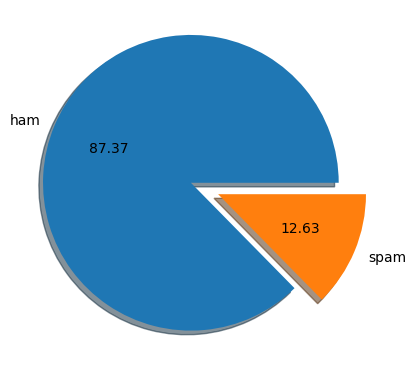

In [19]:
import matplotlib.pyplot as plt
explode=(0.2,0)
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f",shadow='True',explode=explode)

In [20]:
#data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']= df['text'].apply(len)

In [22]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#number of sentences
df['num_sentence']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.sample(5)

,target,text,num_characters,num_words,num_sentence
376,0,You could have seen me..i did't recognise you ...,53,14,2
1578,0,How to Make a girl Happy? It's not at all diff...,611,220,38
1716,0,Sorry about earlier. Putting out fires.Are you...,107,24,3
1487,0,I told your number to gautham..,31,7,1
2516,0,Yes.i'm in office da:),22,7,1


In [27]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

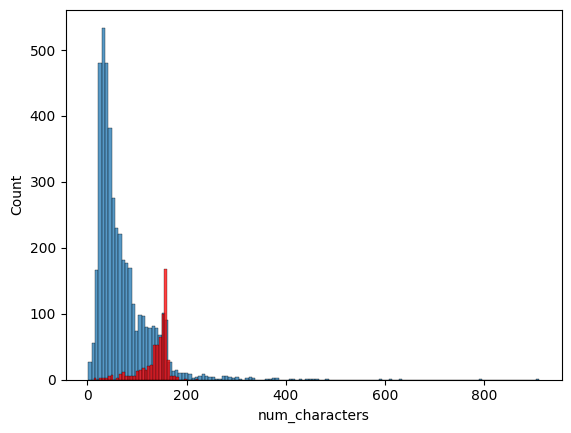

In [32]:
#spam messages have very less number of words as compred to ham
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

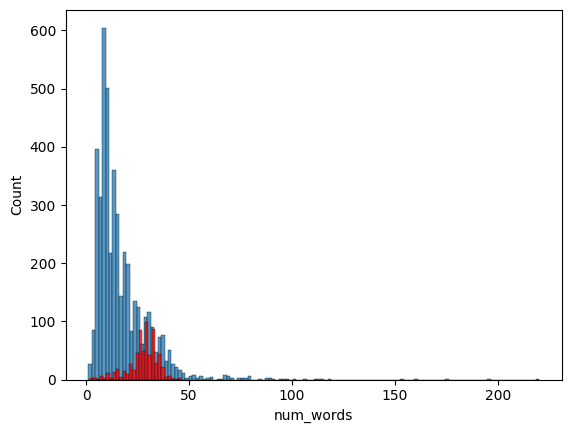

In [33]:
#spam messages have less number of words as compared to the ham messages
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

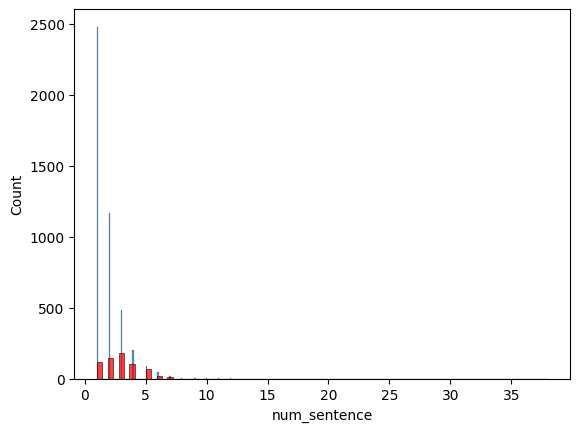

In [34]:
#spam messages has less number of sentences
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

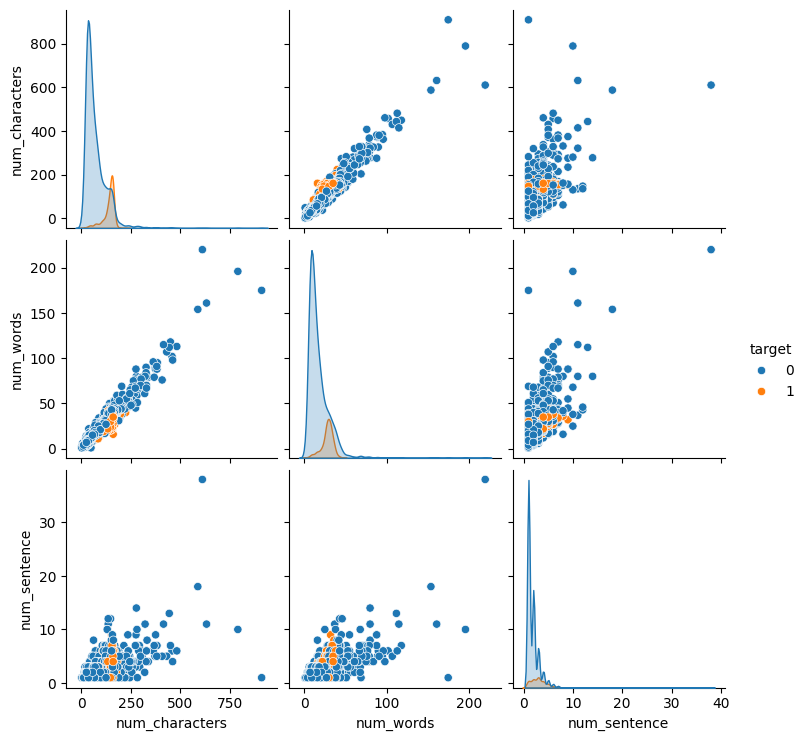

In [35]:

sns.pairplot(df,hue='target')

<Axes: >

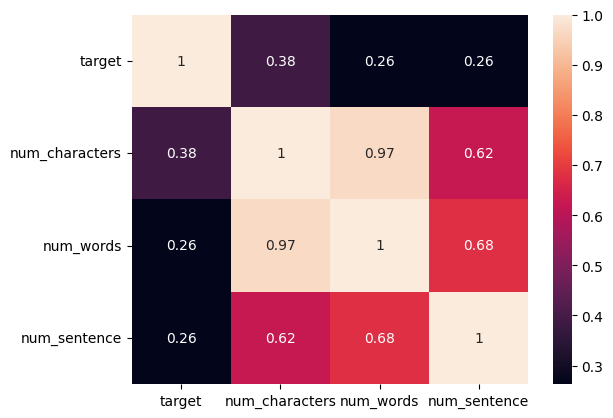

In [36]:
#num_charcters-target-
#num_chacrters-num_sentence,num_words
#num_words- num_charcters,num_sentence
#num_sentence- num_charcters,num_words

sns.heatmap(df[['target','num_characters','num_words','num_sentence']].corr(),annot=True)

<h3 style="font-size:24px;">3.data preprocessing</h3>

In [37]:
df['text']=df['text'].str.lower()

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [39]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))


In [40]:
df['text']=df['text'].apply(remove_punctuation)

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

def remove_stopwords(text, language="english"):

    # Tokenize the text
    words = word_tokenize(text)

    stop_words = set(stopwords.words(language))

    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the words back into a sentence
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df['text']=df['text'].apply(remove_stopwords)
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah dont think goes usf lives around though,61,15,1


In [43]:
import re

def remove_specialcharacters(text):
    clean_text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return clean_text

In [44]:
df['text']=df['text'].apply(remove_specialcharacters)
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah dont think goes usf lives around though,61,15,1


In [45]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
def stem_text(text):
    words = text.split()  # Split text into words
    stemmed_words = [ps.stem(word) for word in words]  # Apply stemming
    return ' '.join(stemmed_words)  # Join back into a string


In [46]:
df['transformed_text']=df['text'].apply(stem_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,go jurong point crazy available bugis n great ...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say early hor u c already say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,61,15,1,nah dont think goe usf live around though


In [48]:
!pip install wordcloud



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

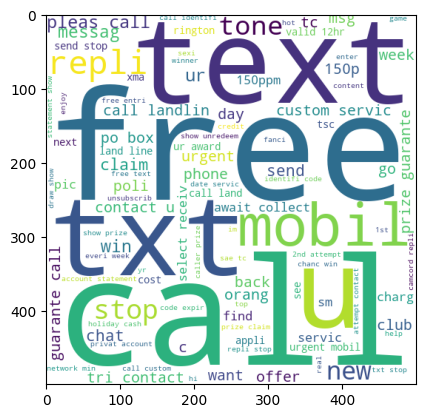

In [51]:
plt.imshow(spam_wc)

In [52]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

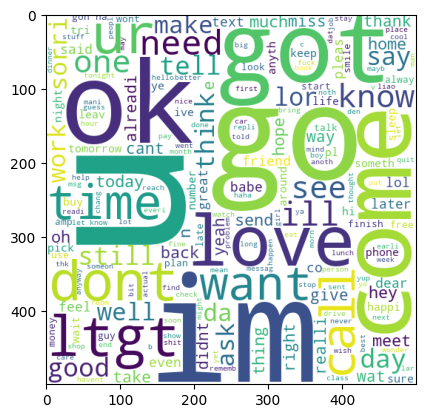

In [53]:
plt.imshow(ham_wc)

In [54]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

10815

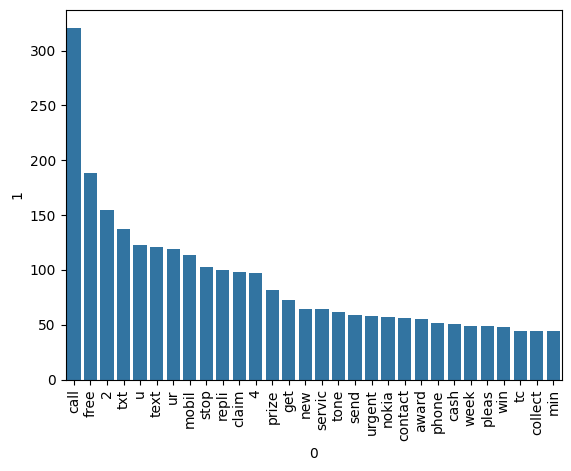

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

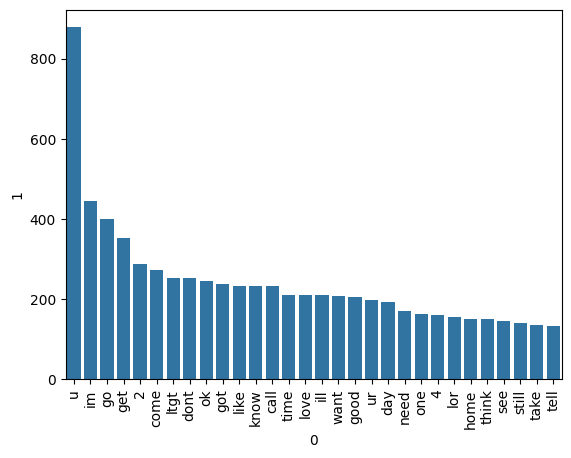

In [58]:
from collections  import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
)
plt.xticks(rotation='vertical')
plt.show()

<h3 style="font-size:24px;">4.modelling</h3>

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
x.shape

(5169, 3000)

In [61]:
y= df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [65]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [67]:
accuracy= accuracy_score(y_test,y_pred1)
print("gaussian nb accuracy=",accuracy)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

gaussian nb accuracy= 0.8646034816247582
[[773 116]
 [ 24 121]]
0.510548523206751


In [68]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[889   0]
 [ 26 119]]
1.0


In [69]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[887   2]
 [ 27 118]]
0.9833333333333333


In [70]:
# tfidf-----> multinomial nb
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
lr= LogisticRegression(C=1.0,penalty='l1',solver='liblinear',max_iter=1000)
svc=SVC(C=1.0,kernel='linear',probability=True)
dtc= DecisionTreeClassifier(max_depth=20,min_samples_split=10,criterion='entropy')
knn= KNeighborsClassifier(n_neighbors=5,metric='cosine')
rfc= RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=10)
abc= AdaBoostClassifier(n_estimators=110,learning_rate=0.5)
bc= BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,bootstrap=True)
gbc= GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,subsample=0.8)
xgb= XGBClassifier(n_estimators=200,max_depth=7,learning_rate=0.1,subsample=0.8,use_label_encoder=False,eval_metric='logloss')

In [73]:
clfs={
    'SVC':svc,
    'LR':lr,
    'DTC':dtc,
    'KN':knn,
    'RF':rfc,
    'Adaboost':abc,
    'Bagging':bc,
    'GBC':gbc,
    'XGB':xgb}

In [74]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [75]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf,x_train,y_train,x_test,y_test)
    print("for",name)
    print("accuracy=",current_accuracy)
    print("precision=",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC
accuracy= 0.9806576402321083
precision= 0.9770992366412213
for LR
accuracy= 0.9477756286266924
precision= 0.8888888888888888
for DTC
accuracy= 0.9506769825918762
precision= 0.873015873015873
for KN
accuracy= 0.9622823984526112
precision= 0.9818181818181818
for RF
accuracy= 0.9497098646034816
precision= 0.9894736842105263
for Adaboost
accuracy= 0.9003868471953579
precision= 0.85
for Bagging
accuracy= 0.9671179883945842
precision= 0.9111111111111111
for GBC
accuracy= 0.965183752417795
precision= 0.9739130434782609


C:\Users\Nishant\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:46:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


for XGB
accuracy= 0.9738878143133463
precision= 0.9682539682539683


In [76]:
df_performance= pd.DataFrame({'algorithm':clfs.keys(),'accuracy':accuracy_scores,'precision':precision_scores}).sort_values('precision',ascending=False)

In [77]:
df_performance

,algorithm,accuracy,precision
4,RF,0.949710,0.989474
3,KN,0.962282,0.981818
0,SVC,0.980658,0.977099
7,GBC,0.965184,0.973913
8,XGB,0.973888,0.968254
6,Bagging,0.967118,0.911111
1,LR,0.947776,0.888889
2,DTC,0.950677,0.873016
5,Adaboost,0.900387,0.850000


In [78]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,go jurong point crazy available bugis n great ...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say early hor u c already say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,61,15,1,nah dont think goe usf live around though


In [79]:

rfc=RandomForestClassifier(n_estimators=220,max_depth=25,min_samples_split=10)
mnb =MultinomialNB()
knn= KNeighborsClassifier(n_neighbors=5,metric='cosine')
xgb= XGBClassifier(n_estimators=210,max_depth=7,learning_rate=0.1,subsample=0.8,eval_metric='logloss')
from sklearn.ensemble import VotingClassifier

In [80]:
voting= VotingClassifier(estimators=[('svm',svc),('nb',mnb),('rfc',rfc),('xgb',xgb),('kn',knn)],voting='soft')

In [81]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm', SVC(kernel='linear', probability=True)),
                             ('nb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(max_depth=25,
                                                     min_samples_split=10,
                                                     n_estimators=220)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=Non...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=210, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('kn', KNeighborsClassifier(metric='cosine'))],
                 voting='soft')

In [82]:
#going with voting classifier
y_pred_voting= voting.predict(x_test)
print(accuracy_score(y_test,y_pred_voting))
print(precision_score(y_test,y_pred_voting))

0.9787234042553191
1.0


In [83]:
#aply stacking 
estimators=[('svm',svc),('nb',mnb),('kn',knn)]
final_estimator= XGBClassifier(n_estimators=210,max_depth=7,learning_rate=0.1,subsample=0.8,eval_metric='logloss')

In [84]:
from sklearn.ensemble import StackingClassifier
Sc= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [85]:
Sc.fit(x_train,y_train)
y_pred_stack =Sc.predict(x_test)
print(accuracy_score(y_test,y_pred_stack))
print(precision_score(y_test,y_pred_stack))

0.97678916827853
0.9416058394160584


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [88]:
from sklearn.naive_bayes import MultinomialNB
import pickle

# Example training
model = MultinomialNB()
model.fit(x_train, y_train)  # MUST do this before dumping!

# Then save
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
